# Data Cleaning (Consume)

## Objective
The main aim here is to guarantee that the consumption dataset is devoid of data quality issues and inconsistencies.

## Summary of Data Issues
In the course of analysis, inconsistencies in date formatting were spotted across multiple records, prompting the need for standardization.

### Outlier Detection and Treatment
For the purpose of improving data accuracy, a customized z-score method was applied to detect outliers and subsequently eliminate them.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', None)

## Read CSV

In [2]:
house = pd.read_csv(r"C:\Users\PC 2\Desktop\Data Analisis\Jupyter\Project 1\Marketing\ifood_df.csv") 

## Display the first few rows to inspect the data

In [3]:
house.sample(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
979,46086.0,0,1,34,244,8,32,7,2,50,4,3,1,8,4,0,0,0,0,0,0,3,11,0,64,2397,1,0,0,0,0,0,0,1,0,0,293,243,0
1251,64191.0,0,1,30,420,15,186,151,38,15,3,5,3,13,3,0,0,0,0,0,0,3,11,0,57,2682,0,0,1,0,0,0,0,0,1,0,810,795,0


In [4]:
house.shape

(2205, 39)

In [5]:
house.Income.describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [6]:
house.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

## Rename Dataset Columns

In [7]:
df = house.rename(columns={
    'Income': 'Household_Income',
    'Age': 'CustomerAge',
    'Customer_Days': "Customer_Days",
    'marital_Divorced': 'Marital_Divorced',
    'marital_Married': 'Marital_Married',
    'marital_Single': 'Marital_Single',
    'marital_Together': 'Marital_Together',
    'marital_Widow': 'Marital_Widow',
    'education_2n Cycle': 'Education_2ndCycle',
    'education_Basic': 'Education_Basic',
    'education_Graduation': 'Education_Graduation',
    'education_Master': 'Education_Master',
    'education_PhD': 'Education_PhD',
    'Kidhome': 'Kids_per_Home',
    'Teenhome': 'Teens_per_Home',
    'Recency': 'Recency',
    'NumDealsPurchases': 'DealsPurchases',
    'NumWebPurchases': 'WebPurchases',
    'NumCatalogPurchases': 'CatalogPurchases',
    'NumStorePurchases': 'StorePurchases',
    'NumWebVisitsMonth': 'WebVisitsPerMonth',
    'MntWines': 'Spent_Wines',
    'MntFruits': 'Spent_Fruits',
    'MntMeatProducts': 'Spent_Meat',
    'MntFishProducts': 'Spent_Fish',
    'MntSweetProducts': 'Spent_Sweets',
    'MntGoldProds': 'Spent_Gold',
    'MntTotal': 'Total_Spent',
    'MntRegularProds': 'Spent_RegularProducts',
    'AcceptedCmp1': 'First_Campaign',
    'AcceptedCmp2': 'Second_Campaign',
    'AcceptedCmp3': 'Third_Campaign',
    'AcceptedCmp4': 'Fourth_Campaign',
    'AcceptedCmp5': 'Fifth_Campaign',
    'AcceptedCmpOverall': 'TotalAcceptedCampaigns',
    'Complain': 'HasComplained',
    'Z_CostContact': 'CostPerContact',
    'Z_Revenue': 'RevenuePerContact',
    'Response': 'Response'
}).copy()

## Define the Order of the Columns

In [8]:
# Define the desired column sequence by category and importance
column_sequence = [
    # Demographics
    'CustomerAge',
    'Customer_Days',
    'Marital_Divorced',
    'Marital_Married',
    'Marital_Single',
    'Marital_Together',
    'Marital_Widow',
    'Education_2ndCycle',
    'Education_Basic',
    'Education_Graduation',
    'Education_Master',
    'Education_PhD',
    
    # Household Characteristics
    'Household_Income',
    'Kids_per_Home',
    'Teens_per_Home',
    
    # Purchase Behavior
    'Recency',
    'DealsPurchases',
    'WebPurchases',
    'CatalogPurchases',
    'StorePurchases',
    'WebVisitsPerMonth',
    'Spent_Wines',
    'Spent_Fruits',
    'Spent_Meat',
    'Spent_Fish',
    'Spent_Sweets',
    'Spent_Gold',
    'Total_Spent',
    'Spent_RegularProducts',
    
    # Marketing Campaigns
    'First_Campaign',
    'Second_Campaign',
    'Third_Campaign',
    'Fourth_Campaign',
    'Fifth_Campaign',
    'TotalAcceptedCampaigns',
    
    # Customer Interaction
    'HasComplained',
    'CostPerContact',
    'RevenuePerContact',
    'Response'
]

# Reorder the DataFrame columns
df = df[column_sequence]

## Remove Duplicates

In [9]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
df.shape

(2021, 39)

In [10]:
df.describe()

,CustomerAge,Customer_Days,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Education_2ndCycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Household_Income,Kids_per_Home,Teens_per_Home,Recency,DealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsPerMonth,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,Total_Spent,Spent_RegularProducts,First_Campaign,Second_Campaign,Third_Campaign,Fourth_Campaign,Fifth_Campaign,TotalAcceptedCampaigns,HasComplained,CostPerContact,RevenuePerContact,Response
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.0,2021.0,2021.000000
mean,51.117269,2511.613063,0.105888,0.388422,0.219198,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,51687.258783,0.443345,0.509649,48.880752,2.330035,4.115289,2.644730,5.807521,5.340426,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,563.789213,519.867392,0.065809,0.012865,0.074715,0.076695,0.072241,0.302326,0.009401,3.0,11.0,0.153884
std,11.667616,202.546762,0.307771,0.487512,0.413806,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,20713.046401,0.536196,0.546393,28.950917,1.892778,2.753588,2.799126,3.230434,2.426319,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,576.775749,554.797857,0.248009,0.112720,0.262997,0.266172,0.258951,0.680812,0.096527,0.0,0.0,0.360927
min,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,43.000000,2337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35416.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,50.000000,2511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51412.000000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,343.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,68274.000000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,964.000000,883.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,113734.000000,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2491.000000,2458.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.0,11.0,1.000000


## Make new and drop columns to have more order

In [11]:
df.loc[df["Marital_Divorced"] == 1, "Marital_Status"] = "Divorced"
df.loc[df["Marital_Married"] == 1, "Marital_Status"] = "Married"
df.loc[df["Marital_Single"] == 1, "Marital_Status"] = "Single"
df.loc[df["Marital_Together"] == 1, "Marital_Status"] = "Together"
df.loc[df["Marital_Widow"] == 1, "Marital_Status"] = "Widow"

In [12]:
df = df.drop(columns=["Marital_Divorced", "Marital_Married", "Marital_Single", "Marital_Together", "Marital_Widow"]).copy()

In [13]:
df.loc[df["Education_2ndCycle"] == 1, "Education_Level"] = "Secondary"
df.loc[df["Education_Basic"] == 1, "Education_Level"] = "Primary"
df.loc[df["Education_Graduation"] == 1, "Education_Level"] = "Completed"
df.loc[df["Education_Master"] == 1, "Education_Level"] = "Masters"
df.loc[df["Education_PhD"] == 1, "Education_Level"] = "Doctorated"

In [14]:
df = df.drop(columns=["Education_2ndCycle", "Education_Basic", "Education_Graduation", "Education_Master", "Education_PhD"]).copy()

In [15]:
df.head()

,CustomerAge,Customer_Days,Household_Income,Kids_per_Home,Teens_per_Home,Recency,DealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsPerMonth,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,Total_Spent,Spent_RegularProducts,First_Campaign,Second_Campaign,Third_Campaign,Fourth_Campaign,Fifth_Campaign,TotalAcceptedCampaigns,HasComplained,CostPerContact,RevenuePerContact,Response,Marital_Status,Education_Level
0,63,2822,58138.0,0,0,58,3,8,10,4,7,635,88,546,172,88,88,1529,1441,0,0,0,0,0,0,0,3,11,1,Single,Completed
1,66,2272,46344.0,1,1,38,2,1,1,2,5,11,1,6,2,1,6,21,15,0,0,0,0,0,0,0,3,11,0,Single,Completed
2,55,2471,71613.0,0,0,26,1,8,2,10,4,426,49,127,111,21,42,734,692,0,0,0,0,0,0,0,3,11,0,Together,Completed
3,36,2298,26646.0,1,0,26,2,2,0,4,6,11,4,20,10,3,5,48,43,0,0,0,0,0,0,0,3,11,0,Together,Completed
4,39,2320,58293.0,1,0,94,5,5,3,6,5,173,43,118,46,27,15,407,392,0,0,0,0,0,0,0,3,11,0,Married,Doctorated


In [16]:
df["Age_Group"] = ""
df.loc[(df["CustomerAge"] >= 18) & (df["CustomerAge"] <= 35), "Age_Group"] = "Young Adult"
df.loc[(df["CustomerAge"] >= 36) & (df["CustomerAge"] <= 65), "Age_Group"] = "Middle-Aged"
df.loc[df["CustomerAge"] > 65, "Age_Group"] = "Senior"

In [17]:
df["Total_Purchases"] = df[['DealsPurchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases']].sum(axis=1)

In [18]:
df["Total_Spent"] = df[['Spent_Wines', 'Spent_Fruits', 'Spent_Meat', 'Spent_Fish',"Spent_Sweets","Spent_Gold", "Spent_RegularProducts"]].sum(axis=1)

In [19]:
df.head()

,CustomerAge,Customer_Days,Household_Income,Kids_per_Home,Teens_per_Home,Recency,DealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsPerMonth,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,Total_Spent,Spent_RegularProducts,First_Campaign,Second_Campaign,Third_Campaign,Fourth_Campaign,Fifth_Campaign,TotalAcceptedCampaigns,HasComplained,CostPerContact,RevenuePerContact,Response,Marital_Status,Education_Level,Age_Group,Total_Purchases
0,63,2822,58138.0,0,0,58,3,8,10,4,7,635,88,546,172,88,88,3058,1441,0,0,0,0,0,0,0,3,11,1,Single,Completed,Middle-Aged,25
1,66,2272,46344.0,1,1,38,2,1,1,2,5,11,1,6,2,1,6,42,15,0,0,0,0,0,0,0,3,11,0,Single,Completed,Senior,6
2,55,2471,71613.0,0,0,26,1,8,2,10,4,426,49,127,111,21,42,1468,692,0,0,0,0,0,0,0,3,11,0,Together,Completed,Middle-Aged,21
3,36,2298,26646.0,1,0,26,2,2,0,4,6,11,4,20,10,3,5,96,43,0,0,0,0,0,0,0,3,11,0,Together,Completed,Middle-Aged,8
4,39,2320,58293.0,1,0,94,5,5,3,6,5,173,43,118,46,27,15,814,392,0,0,0,0,0,0,0,3,11,0,Married,Doctorated,Middle-Aged,19


## Make a Correlation Matrix to search for worthless columns

In [20]:
selected_columns = ["Customer_Days", 'Household_Income', 'Kids_per_Home',
       'Teens_per_Home', 'Recency', 'DealsPurchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'WebVisitsPerMonth',
       'Spent_Wines', 'Spent_Fruits', 'Spent_Meat', 'Spent_Fish',
       'Spent_Sweets', 'Spent_Gold', 'Total_Spent', 'Spent_RegularProducts',
       'First_Campaign', 'Second_Campaign', 'Third_Campaign',
       'Fourth_Campaign', 'Fifth_Campaign', 'TotalAcceptedCampaigns',
       'HasComplained', 'CostPerContact', 'RevenuePerContact', 'Response','Total_Purchases']

corr_matrix = df[selected_columns].corr()


In [21]:
# df = df.drop(columns=["Spent_Wines", "Spent_Fruits", "Spent_Meat", "Spent_Fish", "Spent_Sweets", "Spent_Gold"])

# House Hold

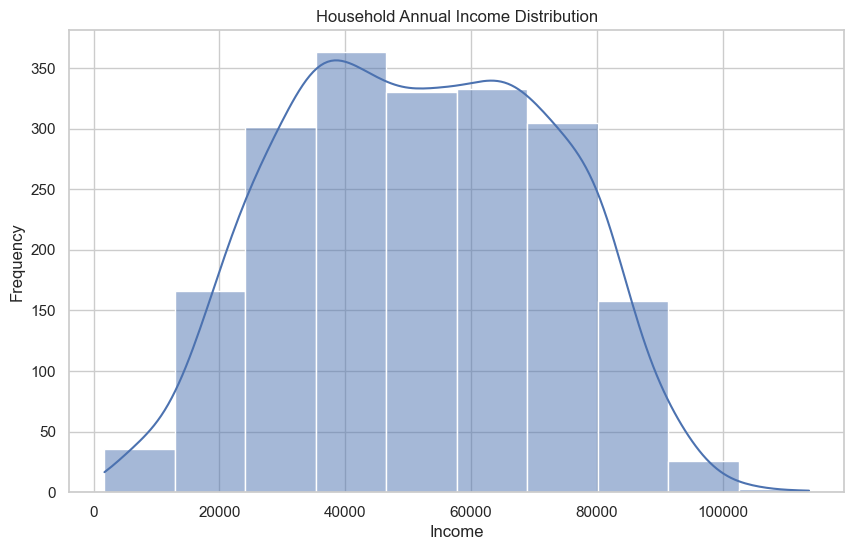

51687.2587827808 Mean Income
51412.0 Income Median
The income range is 112004.0


In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Household_Income", bins=10, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Household Annual Income Distribution')
plt.show()
print (f"{df["Household_Income"].mean()} Mean Income")
print (f"{df["Household_Income"].median()} Income Median")
print(f"The income range is {df['Household_Income'].max() - df['Household_Income'].min()}")


# Total Spent

In [23]:
df['zscore_spent'] = ( df.Total_Spent - df.Total_Spent.mean() ) / df.Total_Spent.std()

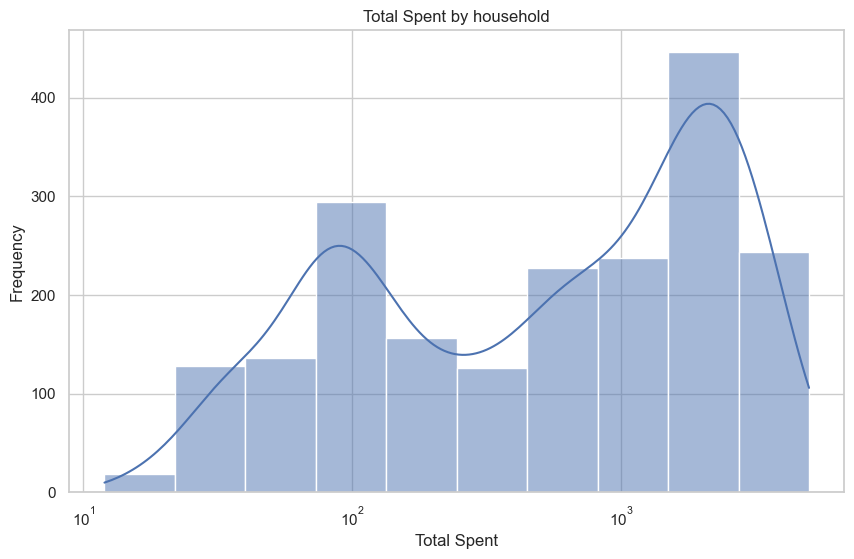

1132.1262425447317 Mean Spent
690.0 Median Spent
The spent range is 4970


In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Total_Spent", bins=10, kde=True, log_scale=10)
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Total Spent by household')
plt.show()
print (f"{df["Total_Spent"].mean()} Mean Spent")
print (f"{df["Total_Spent"].median()} Median Spent")
print(f"The spent range is {df['Total_Spent'].max() - df['Total_Spent'].min()}")

# Web Visits

In [25]:
df['zscore_web'] = ( df.WebVisitsPerMonth - df.WebVisitsPerMonth.mean() ) / df.WebVisitsPerMonth.std()
df = df[df['zscore_web'] <= 3]

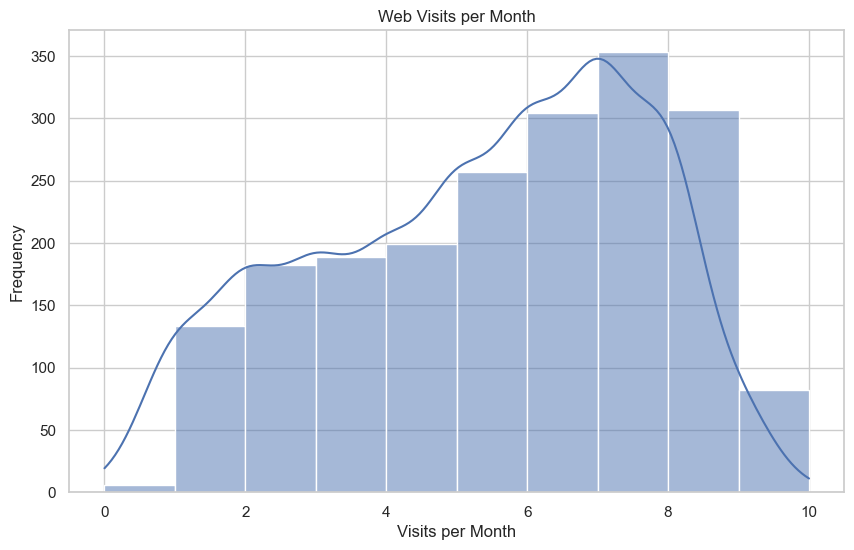

5.286779324055666 Mean Visist per Month
6.0 Median Visits per Month
The spent range is 10


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="WebVisitsPerMonth", bins=10, kde=True)
plt.xlabel('Visits per Month')
plt.ylabel('Frequency')
plt.title('Web Visits per Month')
plt.show()
print (f"{df["WebVisitsPerMonth"].mean()} Mean Visist per Month")
print (f"{df["WebVisitsPerMonth"].median()} Median Visits per Month")
print(f"The spent range is {df['WebVisitsPerMonth'].max() - df['WebVisitsPerMonth'].min()}")